In [ ]:
#Alumnos: Brian Guerrero, Manuel Guerrero, Carlos Sojo y Ulises Forsa

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv('/content/CLIMA PROGRAMACION.csv')
# Mostrar las primeras filas
print(df.head())


   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


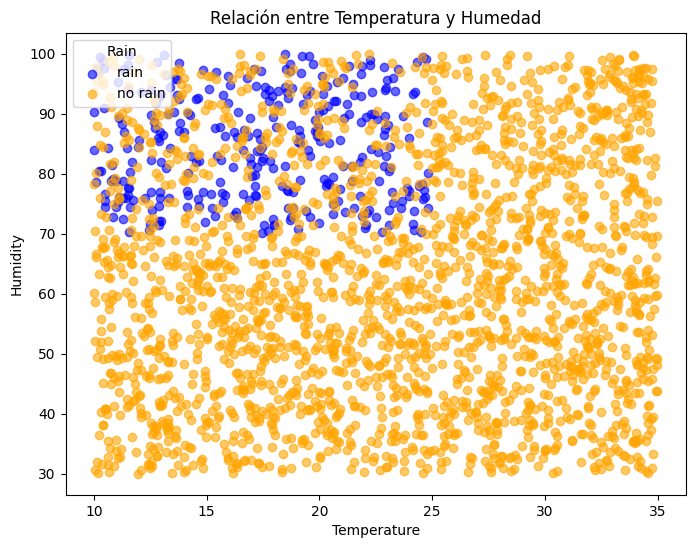

In [ ]:
import matplotlib.pyplot as plt
colors = {'rain': 'blue', 'no rain': 'orange'}
plt.figure(figsize=(8, 6))
for category, color in colors.items():
    subset = df[df['Rain'] == category]
    plt.scatter(subset['Temperature'], subset['Humidity'], label=category, color=color, alpha=0.6)

plt.title("Relación entre Temperatura y Humedad")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.legend(title="Rain")
plt.show()

# Interpretación: Los puntos azules son aquellos valores en donde llovio(Rain), y vemos que la lluvia se encuentra ubicada en los valores donde la humedad es alta (aprox 80 para arriba) y temperatura baja(25 grados celcius para abajo).
# Interpretación 2: Por otro lado los puntos azules son aquellos valores que indican que no llovio y estan mas distribuidos a niveles mas altos de temperatura y de humedad mas baja.
#Interpretacion 3: Tambien hay zonas que se mezclan los dias de lluvia y los que no en el rango de temperatura entre 15°C y 20°C y humedad entre 70% y 90%.

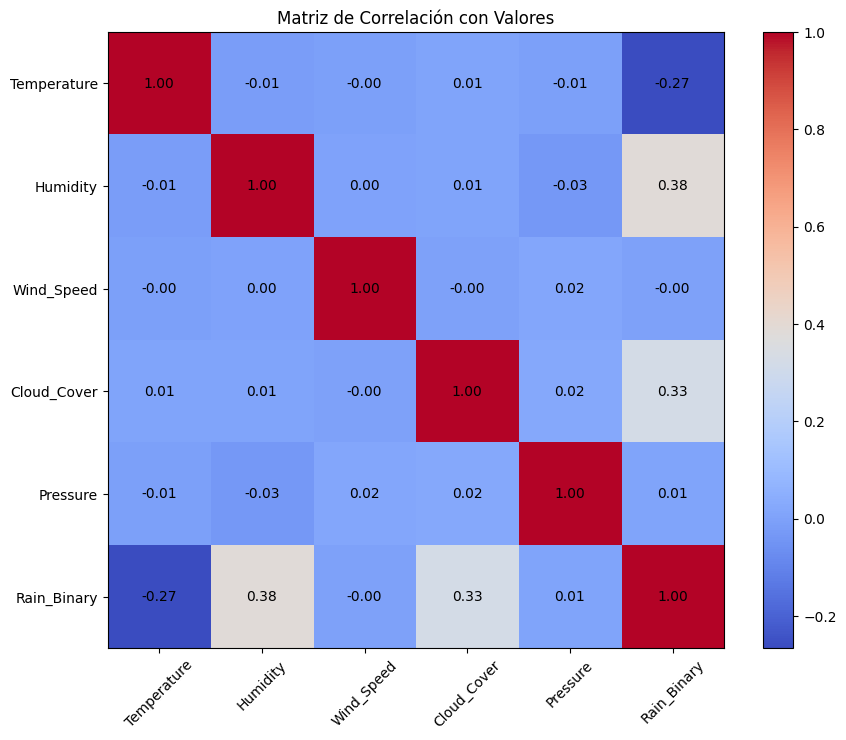

In [ ]:

numeric_columns = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap="coolwarm", interpolation='none')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color="black")

plt.colorbar(im)
plt.title("Matriz de Correlación con Valores")
plt.xticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns)
plt.show()


#Interpretacion= Siempre son 1.00, ya que cada variable está perfectamente correlacionada consigo misma
#Interpretacion2= Humidity y Rain_Binary: Correlación de 0.38, lo que indica una relación positiva moderada (mayor humedad está asociada con mayor probabilidad de lluvia).
#Interpretacion3= Temperature y Rain_Binary: Correlación de -0.27, lo que indica una relación negativa (mayor temperatura está asociada con menor probabilidad de lluvia).
#Interpretacion4= Cloud_Cover y Rain_Binary: Correlación de 0.33, lo que indica que más cobertura de nubes está asociada con mayor probabilidad de lluvia.

Matriz de confusión:
 [[642  20]
 [ 33  55]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       662
           1       0.73      0.62      0.67        88

    accuracy                           0.93       750
   macro avg       0.84      0.80      0.82       750
weighted avg       0.93      0.93      0.93       750



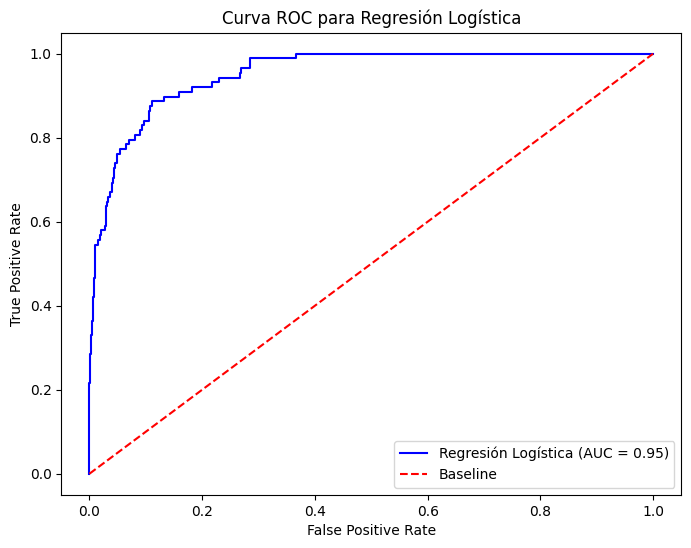

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

if "Rain_Binary" not in df.columns:
    df["Rain_Binary"] = df["Rain"].apply(lambda x: 1 if x.strip().lower() == "rain" else 0)

X = df[["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]]
y = df["Rain_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Regresión Logística (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline")
plt.title("Curva ROC para Regresión Logística")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


#Interpretación= La curva ROC tiene una función similar a la matriz de confusión, se utilizan los resultados de la matriz para realizar un gráfico en base a estos. De esta manera se puede visualizar los posibles puntos de corte en función a los falsos positivos (predicciones erradas). En este caso, la curva ROC nos sirve para medir de forma visual la precisión de la matriz de confusión (0.93)

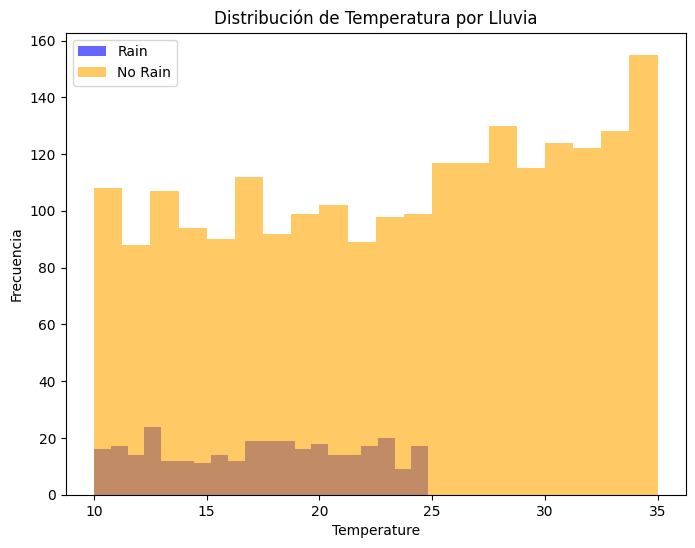

In [ ]:

rain = df[df["Rain"] == "rain"]["Temperature"]
no_rain = df[df["Rain"] == "no rain"]["Temperature"]


plt.figure(figsize=(8, 6))
plt.hist(rain, bins=20, alpha=0.6, label="Rain", color="blue")
plt.hist(no_rain, bins=20, alpha=0.6, label="No Rain", color="orange")
plt.title("Distribución de Temperatura por Lluvia")
plt.xlabel("Temperature")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


#Interpretación= Lo marron es (Rain), que en realidad fue graficado con azul pero se ve asi por la sobreposicion ::: Días con lluvia y lo amarrillo (No Rain): Días sin lluvia.
#Interpretación= La frecuencia de días con lluvia es más alta en temperaturas bajas.
#Interpretación= A medida que la temperatura aumenta (más allá de 25 grados), la cantidad de días con lluvia disminuye drásticamente, la mayoría de los días sin lluvia tienen temperaturas más altas.
#Interpretación= En temperaturas bajas (10-20 grados), los días sin lluvia también son comunes, pero menos frecuentes en comparación con las temperaturas altas. Por eso se ve un color marron, porque esta sobrepuesto en realidad es azul los dias que llovio.
#Interpretación= En resumen, existe una inversion entre la baja temperatura es mas frecuente los días con lluvia mientras que a  alta temperatura, los días sin lluvia predominan.



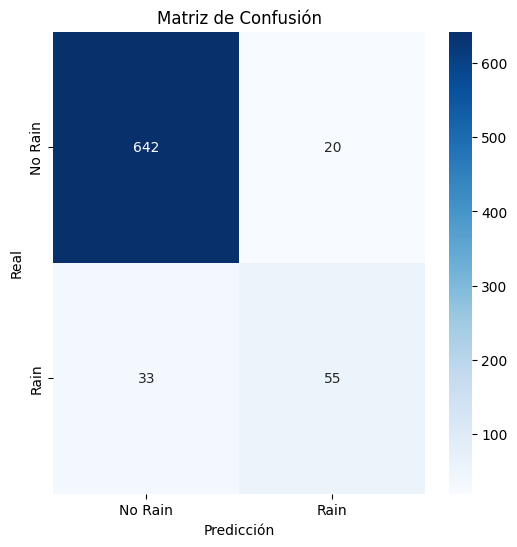

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

if "Rain_Binary" not in df.columns:
    df["Rain_Binary"] = df["Rain"].apply(lambda x: 1 if x.strip().lower() == "rain" else 0)

X = df[["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]]
y = df["Rain_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

#Interpretación=  La matriz de confusión se utiliza para evaluar el rendimiento de un modelo de clasificación, en este caso se utiliza para medir los aciertos y fallos al momento de predecir si iba a llover o no. Los resultados fueron: 642 aciertos y 20 fallos al predecir que no iba a llover y 55 aciertos y 30 fallos al predecir que si iba a llover.

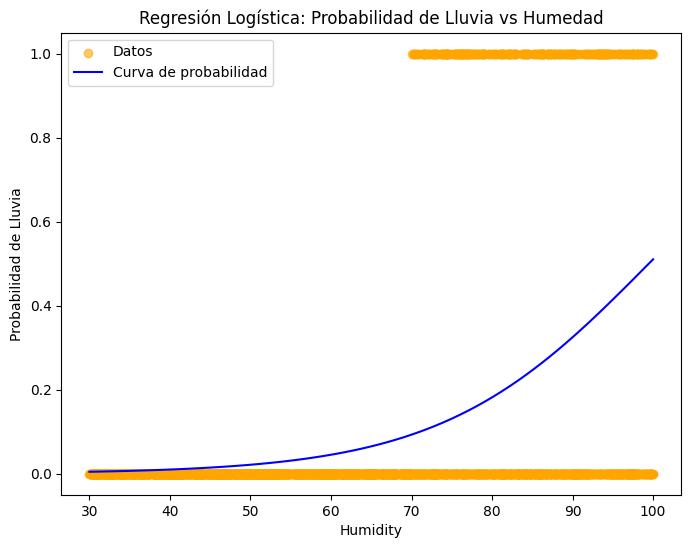

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = df["Humidity"].values.reshape(-1, 1)
y = df["Rain_Binary"]


logistic_model = LogisticRegression()
logistic_model.fit(X, y)


x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = logistic_model.predict_proba(x_range)[:, 1]


plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label="Datos", color="orange")
plt.plot(x_range, y_prob, color="blue", label="Curva de probabilidad")
plt.title("Regresión Logística: Probabilidad de Lluvia vs Humedad")
plt.xlabel("Humidity")
plt.ylabel("Probabilidad de Lluvia")
plt.legend()
plt.show()


#Regresión logística

#Interpretación= 0 (sin lluvia) se encuentra en la parte inferior (probabilidad 0) y 1 (lluvia) se encuentra en la parte superior (probabilidad 1).
#Interpretación=  Relación que a mayor humedad, la probabilidad de lluvia aumentaa.
#Interpretación= Para humedades bajas (30-60), la probabilidad de lluvia es cercana a 0.
#Interpretación= A partir de valores altos de humedad (70-100), la probabilidad de lluvia aumenta significativamente.
#Interpretación= La Curva de probabilidad sube de forma suavizada para la probabilidad de lluvia a medidad que auenta la humedad

<Figure size 800x600 with 0 Axes>

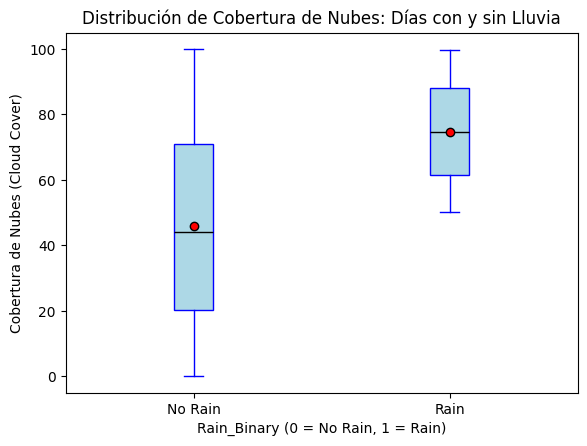

                  mean     median         Q1         Q3
Rain_Binary                                            
0            46.058162  44.206476  20.260167  70.984932
1            74.720123  74.517993  61.537020  87.921606


In [ ]:

plt.figure(figsize=(8, 6))
df.boxplot(column="Cloud_Cover", by="Rain_Binary", grid=False, patch_artist=True, showmeans=True,
           boxprops=dict(facecolor="lightblue", color="blue"),
           meanprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black"),
           medianprops=dict(color="black"),
           whiskerprops=dict(color="blue"),
           capprops=dict(color="blue"))
plt.title("Distribución de Cobertura de Nubes: Días con y sin Lluvia")
plt.suptitle("")
plt.xlabel("Rain_Binary (0 = No Rain, 1 = Rain)")
plt.ylabel("Cobertura de Nubes (Cloud Cover)")
plt.xticks(ticks=[1, 2], labels=["No Rain", "Rain"], rotation=0)
plt.show()


statistics = df.groupby("Rain_Binary")["Cloud_Cover"].agg(["mean", "median"])


statistics["Q1"] = df.groupby("Rain_Binary")["Cloud_Cover"].quantile(0.25)  # Primer cuartil
statistics["Q3"] = df.groupby("Rain_Binary")["Cloud_Cover"].quantile(0.75)  # Tercer cuartil


print(statistics)

#Boxplot



#Interpretacion= Días sin lluvia:
#Promedio (mean): Aproximadamente 46.06.
#Mediana (median): 44.21.
#Primer cuartil (Q1): 20.26 o menos (esto sería el 25% de los días sin lluvia).
#Tercer cuartil (Q3): 70.98 o menos (esto sería el 75% de los días sin lluvia).


#nterpretación - Días con lluvia:
#Promedio (mean): Aproximadamente 74.72.
#Mediana (median): 74.52.
#Primer cuartil (Q1): 61.54 o menos (esto sería el 25% de los días con lluvia).
#Tercer cuartil (Q3): 87.92 o menos (esto sería el 75% de los días con lluvia)

#Interpretacion= Los días con lluvia tienen una cobertura de nubes significativamente mayor (74.72) que los días sin lluvia (46.06), (más alta mediana y promedio) en comparación con los días sin lluvia.
#Interpretacion=Los días con lluvia tienen valores más altos en todos los indicadores (mediana, Q1 y Q3), lo que refuerza que la lluvia está asociada con mayor cobertura de nubes.


